# **HEALTH & WELLNESS DATA SCIENCE PROJECT**

### Introduction

Problematic Internet Use (PIU) has become a growing concern, particularly among children and young people, as digital technology continues to integrate into daily life. The **Severity Impairment Index (SII)** is a standardized measure used to quantify the level of PIU, offering insights into its impact on behavior, mental health, and physical well-being. This study aims to develop a predictive model for SII using a rich dataset encompassing demographic, physical, and behavioral attributes, as well as results from the **Parent-Child Internet Addiction Test (PCIAT)**.

The dataset includes 3,960 records with 81 features, providing a diverse range of indicators such as age, BMI, internet usage habits, and psychological scores. However, the presence of over **100,000 missing values** and an **imbalanced class distribution** presents significant challenges for model development. Additionally, the test dataset lacks PCIAT features, which are highly correlated with the target variable, further complicating the prediction process.

This study explores various machine learning approaches, including classification and regression, to predict SII levels. Feature selection, imputation techniques, and hyperparameter tuning are employed to create robust models capable of handling the challenges posed by missing data and class imbalance. The findings aim to shed light on the factors contributing to PIU and provide a framework for identifying at-risk individuals, ultimately contributing to the broader understanding of digital behavior management in young populations.

**Key Points**

- The main aim of the competition is to use our training data to predict **sii** or **Severity Impairment Index**, which is a standard measure of Problematic Internet Use (PIU).
- The training data comprises 3,960 records of children and young people with 81 columns (not including the ID column).
- Of particular importance in the data are results of the **Parent-Child Internet Addiction Test (PCIAT)**.
- The target is actually derived from the field PCIAT-PCIAT_Total (scored out of 100).
- We can therefore choose to predict the PCIAT Total and convert this to sii (making this a regression problem) or stick with sii (making this a classification problem).
- The test data is really just formatted sample data. The actual test data of about 3,800 instances is hidden.
- In the sample data none of the 22 PCIAT fields are available (in addition to the target feature). Hence the sample data format has 58 columns compared to 81 in the train data.
- In 1,224 records in the train data the sii target and all the PCIAT columns are missing - presumably because not available.
- Overall there are > 100,000 missing values in the train data.
- Only 2,736 records have a target, the rest are missing.
- 996 of the young people also have sensor data from a worn device which measures gross motor activity.

In [1]:
import pandas as pd

In [ ]:
train = pd.read_csv('train.csv', index_col = 'id')
print("The train data has the shape: ",train.shape)
test = pd.read_csv('test.csv', index_col = 'id')
print("The test data has the shape: ",test.shape)
print("")
print("Total number of missing training values: ", train.isna().sum().sum())
data_dictionary = pd.read_csv('data_dictionary.csv')

The train data has the shape:  (3960, 81)
The test data has the shape:  (20, 58)

Total number of missing training values:  131717


In [ ]:
train

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,114.0,...,38.9177,19.5413,32.6909,NaN,NaN,55.0,NaN,57.647525,3.0,2.0
000fd460,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,...,39.4497,15.4107,27.0552,NaN,2.340,0.0,46.0,64.000000,0.0,0.0
00105258,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,...,NaN,NaN,NaN,NaN,2.170,28.0,38.0,54.000000,2.0,0.0
00115b9f,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,...,58.9338,26.4798,45.9966,NaN,2.451,44.0,31.0,45.000000,0.0,1.0
001f3379,13,1,50.0,22.279952,59.5,112.2,NaN,60.0,73.0,102.0,...,79.6982,35.3804,63.1265,NaN,4.110,34.0,40.0,56.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff6c2bb8,8,0,NaN,17.139810,52.5,67.2,25.0,60.0,65.0,112.0,...,49.3301,20.2645,36.7181,NaN,3.440,22.0,41.0,58.000000,2.0,0.0
ff759544,7,1,NaN,13.927006,48.5,46.6,23.0,65.0,75.0,105.0,...,42.8185,18.0937,30.0453,NaN,NaN,33.0,48.0,67.000000,0.0,1.0
ff8a2de4,13,0,60.0,16.362460,59.5,82.4,NaN,71.0,70.0,104.0,...,66.2889,29.7790,52.8320,NaN,3.260,32.0,35.0,50.000000,1.0,1.0


## **DROPING COLUMNS WHICH ARE NOT NEEDED**

In [ ]:
train = train.loc[:, ~train.columns.str.contains('Season')]
test = test.loc[:, ~test.columns.str.contains('Season')]

In [ ]:
# dropping questions not in test dataset
test_missing_columns = set(train.columns) - set(test.columns)
for col in test_missing_columns:
    if col != 'sii':
        if col != "PCIAT-PCIAT_Total":  # Retain the target column for training
            train.drop(columns=col, inplace=True)

<ipython-input-510-75e5980b7842>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=col, inplace=True)
<ipython-input-510-75e5980b7842>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=col, inplace=True)
<ipython-input-510-75e5980b7842>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=col, inplace=True)
<ipython-input-510-75e5980b7842>:6: SettingWithCopyWarning: 
A value is trying 

In [ ]:
train.columns

Index(['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins',
       'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone',
       'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone',
       'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone',
       'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total',
       'PCIAT-PCIAT_Total', 'SDS-SDS_Total_Raw', 'SDS-SDS_

## **CORRELATION**

In [ ]:
corr = pd.DataFrame(train.corr()['sii'].sort_values(ascending = False))
corr.style.background_gradient(cmap='YlOrRd')

,sii
sii,1.000000
PCIAT-PCIAT_Total,0.899681
Physical-Height,0.373530
Basic_Demos-Age,0.365990
PreInt_EduHx-computerinternet_hoursday,0.336526
Physical-Weight,0.325938
Physical-Waist_Circumference,0.272885
FGC-FGC_CU,0.247364
SDS-SDS_Total_T,0.232982
SDS-SDS_Total_Raw,0.229692


In [ ]:
selection = corr[(corr['sii']>.1) | (corr['sii']<-.1)]
selection = [val for val in selection.index]
selection.remove('sii')
selection.remove('PCIAT-PCIAT_Total')
selection.remove('Physical-BMI')
selection.remove('SDS-SDS_Total_Raw')

In [ ]:
selection

['Physical-Height',
 'Basic_Demos-Age',
 'PreInt_EduHx-computerinternet_hoursday',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'FGC-FGC_CU',
 'SDS-SDS_Total_T',
 'BIA-BIA_BMI',
 'FGC-FGC_PU',
 'BIA-BIA_Frame_num',
 'FGC-FGC_GSD',
 'FGC-FGC_GSND',
 'Physical-Systolic_BP',
 'FGC-FGC_TL',
 'BIA-BIA_FFMI',
 'Basic_Demos-Sex',
 'FGC-FGC_SRL_Zone']

## **MISSING VALUES**

In [ ]:
null = train.isna().sum().sort_values(ascending = False).head(46)
null = pd.DataFrame(null)
null = null.rename(columns= {0:'Missing'})
null.style.background_gradient(cmap='YlOrRd')

,Missing
PAQ_A-PAQ_A_Total,3485
Fitness_Endurance-Time_Sec,3220
Fitness_Endurance-Time_Mins,3220
Fitness_Endurance-Max_Stage,3217
Physical-Waist_Circumference,3062
FGC-FGC_GSND_Zone,2898
FGC-FGC_GSD_Zone,2897
FGC-FGC_GSD,2886
FGC-FGC_GSND,2886
PAQ_C-PAQ_C_Total,2239


In [ ]:
train.dropna(subset=['sii'], inplace=True)

<ipython-input-516-eba46bc739e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(subset=['sii'], inplace=True)


In [ ]:
half_missing = [val for val in train.columns[train.isnull().sum()>len(train)/2]]
half_missing

['Physical-Waist_Circumference',
 'Fitness_Endurance-Max_Stage',
 'Fitness_Endurance-Time_Mins',
 'Fitness_Endurance-Time_Sec',
 'FGC-FGC_GSND',
 'FGC-FGC_GSND_Zone',
 'FGC-FGC_GSD',
 'FGC-FGC_GSD_Zone',
 'PAQ_A-PAQ_A_Total']

In [ ]:
selection = [i for i in selection if i not in half_missing]

In [ ]:
import pandas as pd

missing_values = train[selection].isna().sum().sort_values(ascending=False).head(46)

# Convert the Series to a DataFrame for better formatting and display
null_df = pd.DataFrame(missing_values, columns=['Missing'])

# Display the DataFrame with a gradient background
styled_display = null_df.style.background_gradient(cmap='YlOrRd')
styled_display


,Missing
BIA-BIA_BMI,923
BIA-BIA_Frame_num,923
BIA-BIA_FFMI,923
FGC-FGC_SRL_Zone,859
FGC-FGC_PU,827
FGC-FGC_CU,817
FGC-FGC_TL,817
Physical-Systolic_BP,258
SDS-SDS_Total_T,211
Physical-Height,206


In [ ]:
from sklearn.impute import SimpleImputer

# Create imputers
median_imputer = SimpleImputer(strategy='median')
mean_imputer = SimpleImputer(strategy='mean')
mode_imputer = SimpleImputer(strategy='most_frequent')

# Columns to impute with median
median_cols = ['Physical-Systolic_BP', 'Physical-Height', 'Physical-Weight',
               'BIA-BIA_BMI', 'BIA-BIA_Frame_num', 'BIA-BIA_FFMI']

# Columns to impute with mean
mean_cols = ['SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday']

# Columns to impute with mode (for categorical or where mode is more appropriate)
mode_cols = ['FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone', 'FGC-FGC_PU', 'FGC-FGC_CU', 'FGC-FGC_TL']

# Apply median imputation
train[median_cols] = median_imputer.fit_transform(train[median_cols])

# Apply mean imputation
train[mean_cols] = mean_imputer.fit_transform(train[mean_cols])

# Apply mode imputation
train[mode_cols] = mode_imputer.fit_transform(train[mode_cols])

<ipython-input-520-966538d998bb>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[median_cols] = median_imputer.fit_transform(train[median_cols])
<ipython-input-520-966538d998bb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[mean_cols] = mean_imputer.fit_transform(train[mean_cols])
<ipython-input-520-966538d998bb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
import pandas as pd

missing_values2 = train[selection].isna().sum().sort_values(ascending=False).head(46)

# Convert the Series to a DataFrame for better formatting and display
null_df = pd.DataFrame(missing_values2, columns=['Missing'])

# Display the DataFrame with a gradient background
styled_display = null_df.style.background_gradient(cmap='YlOrRd')
styled_display


,Missing
Physical-Height,0
Basic_Demos-Age,0
PreInt_EduHx-computerinternet_hoursday,0
Physical-Weight,0
FGC-FGC_CU,0
SDS-SDS_Total_T,0
BIA-BIA_BMI,0
FGC-FGC_PU,0
BIA-BIA_Frame_num,0
Physical-Systolic_BP,0


## **SELECTED FEATURES**

- We now have 16 selected features based on
      a) correlation with the target**
      b) relatively few missing values.**
- The idea is to create a robust model that focuses on key signals in the data and reduces some of the excess noise from large numbers of features.
- Some of the min and max values appear to be impossible (such as a minimum weight of zero) or very unlikely.

In [ ]:
describe = train[selection].describe().T
describe = describe[['min','max']].sort_index()
describe.style.background_gradient(cmap='YlOrRd')

,min,max
BIA-BIA_BMI,0.048267,48.375400
BIA-BIA_FFMI,7.864850,217.771000
BIA-BIA_Frame_num,1.000000,3.000000
Basic_Demos-Age,5.000000,22.000000
Basic_Demos-Sex,0.000000,1.000000
FGC-FGC_CU,0.000000,115.000000
FGC-FGC_PU,0.000000,51.000000
FGC-FGC_SRL_Zone,0.000000,1.000000
FGC-FGC_TL,0.000000,21.000000
Physical-Height,36.000000,78.500000


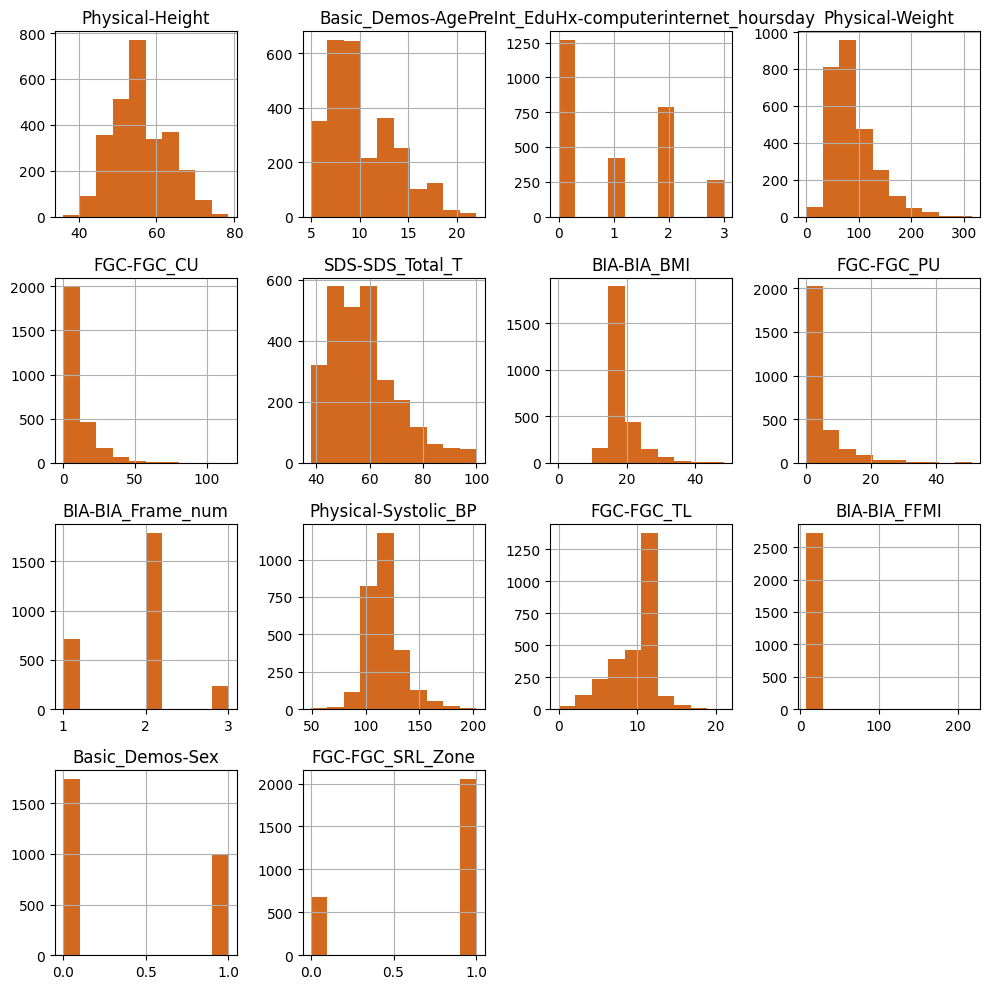

In [ ]:
train[selection].hist(figsize=(10,10), grid = True, color = 'chocolate')
plt.tight_layout()

## **CLASSIFICATION**

In [ ]:
# Feature selection and labels
X = train[selection]
test = test[selection]
y = train.sii

In [ ]:
y

,sii
id,
00008ff9,2.0
000fd460,0.0
00105258,0.0
00115b9f,1.0
001f3379,1.0
...,...
ff6c2bb8,0.0
ff759544,1.0
ff8a2de4,1.0


In [ ]:
X

,Physical-Height,Basic_Demos-Age,PreInt_EduHx-computerinternet_hoursday,Physical-Weight,FGC-FGC_CU,BIA-BIA_BMI,SDS-SDS_Total_T,FGC-FGC_PU,BIA-BIA_Frame_num,Physical-Systolic_BP,FGC-FGC_TL,BIA-BIA_FFMI,FGC-FGC_SRR_Zone,FGC-FGC_SRL_Zone
id,,,,,,,,,,,,,,
00008ff9,46.0,5,3.0,50.8,0.0,16.8792,57.647525,0.0,1.0,114.0,6.0,13.8177,0.0,0.0
000fd460,48.0,9,0.0,46.0,3.0,14.0371,64.000000,5.0,1.0,122.0,3.0,12.8254,1.0,1.0
00105258,56.5,10,2.0,75.6,20.0,17.8506,54.000000,7.0,2.0,117.0,5.0,14.0629,1.0,1.0
00115b9f,56.0,9,0.0,81.6,18.0,18.2943,45.000000,5.0,2.0,117.0,7.0,14.0740,0.0,0.0
001f3379,59.5,13,0.0,112.2,12.0,30.1865,56.000000,6.0,2.0,102.0,8.0,16.6877,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff6c2bb8,52.5,8,2.0,67.2,0.0,17.1417,58.000000,0.0,1.0,112.0,12.0,13.4004,1.0,1.0
ff759544,48.5,7,0.0,46.6,0.0,13.6457,67.000000,0.0,1.0,105.0,4.5,13.2315,0.0,0.0
ff8a2de4,59.5,13,1.0,82.4,16.0,16.3642,50.000000,10.0,1.0,104.0,12.0,14.0629,1.0,1.0


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost with decision stumps
base_model = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(estimator=base_model, n_estimators=50, random_state=42)

# Fit and predict
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.70      0.78      0.74       336
         1.0       0.29      0.26      0.27       131
         2.0       0.24      0.18      0.21        72
         3.0       0.25      0.11      0.15         9

    accuracy                           0.56       548
   macro avg       0.37      0.33      0.34       548
weighted avg       0.53      0.56      0.55       548



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
test = imputer.transform(test)

# Normalize features for kNN
scaler = StandardScaler()
X = scaler.fit_transform(X)
test = scaler.transform(test)

# Split the training data into features (X) and target (y)
# Ensure X and y are properly defined beforehand
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize k-Nearest Neighbors model
k_values = [3, 5, 7, 9, 11]  # Try different k values
results = []

for k in k_values:
    try:
        knn = KNeighborsClassifier(n_neighbors=k)

        # Train the model
        knn.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = knn.predict(X_val)

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)

        # Append results
        results.append({"k": k, "Accuracy": accuracy})

        # Print detailed classification report
        print(f"\nClassification Report for k={k}:")
        print(classification_report(y_val, y_pred))
    except Exception as e:
        results.append({"k": k, "Accuracy": "Error: " + str(e)})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print("Summary of k-NN Performance:")
print(results_df)

# Use the best k based on validation accuracy
best_k = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]["k"]
knn_best = KNeighborsClassifier(n_neighbors=int(best_k))
knn_best.fit(X_train, y_train)

# Predictions on the test set
test_predictions = knn_best.predict(test)
print("\nBest k:", best_k)
print("Test Predictions:", test_predictions)



Classification Report for k=3:
              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75       336
         1.0       0.30      0.27      0.28       131
         2.0       0.32      0.21      0.25        72
         3.0       0.00      0.00      0.00         9

    accuracy                           0.58       548
   macro avg       0.33      0.32      0.32       548
weighted avg       0.54      0.58      0.56       548


Classification Report for k=5:
              precision    recall  f1-score   support

         0.0       0.70      0.82      0.75       336
         1.0       0.25      0.23      0.24       131
         2.0       0.24      0.11      0.15        72
         3.0       0.00      0.00      0.00         9

    accuracy                           0.57       548
   macro avg       0.30      0.29      0.29       548
weighted avg       0.52      0.57      0.54       548



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m


Classification Report for k=7:
              precision    recall  f1-score   support

         0.0       0.71      0.85      0.77       336
         1.0       0.31      0.26      0.28       131
         2.0       0.38      0.17      0.23        72
         3.0       0.00      0.00      0.00         9

    accuracy                           0.61       548
   macro avg       0.35      0.32      0.32       548
weighted avg       0.56      0.61      0.57       548


Classification Report for k=9:
              precision    recall  f1-score   support

         0.0       0.69      0.83      0.75       336
         1.0       0.25      0.22      0.24       131
         2.0       0.23      0.08      0.12        72
         3.0       0.00      0.00      0.00         9

    accuracy                           0.57       548
   macro avg       0.29      0.28      0.28       548
weighted avg       0.51      0.57      0.53       548



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m


Classification Report for k=11:
              precision    recall  f1-score   support

         0.0       0.68      0.84      0.75       336
         1.0       0.29      0.24      0.27       131
         2.0       0.29      0.10      0.15        72
         3.0       0.00      0.00      0.00         9

    accuracy                           0.59       548
   macro avg       0.32      0.30      0.29       548
weighted avg       0.53      0.59      0.54       548

Summary of k-NN Performance:
    k  Accuracy
0   3  0.582117
1   5  0.571168
2   7  0.607664
3   9  0.574818
4  11  0.585766

Best k: 7.0
Test Predictions: [0. 0. 0. 1. 0. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### ALL MODELS

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
test = imputer.transform(test)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)
test = scaler.transform(test)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define models with class weights where applicable
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, class_weight='balanced', C=0.1),
    "k-Nearest Neighbors (kNN)": KNeighborsClassifier(n_neighbors=7),
    "Naive Bayes": GaussianNB(),
    "Linear Discriminant Analysis (LDA)": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis (QDA)": QuadraticDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME'),
    "SVM (Multiclass)": SVC(kernel='rbf', decision_function_shape='ovr', random_state=42, class_weight='balanced')
}

# Train and evaluate each model on the validation set
results = []
for model_name, model in models.items():
    try:
        # Train the model
        model.fit(X_train_resampled, y_train_resampled)

        # Make predictions on the validation set
        y_pred = model.predict(X_val)

        # Calculate accuracy and additional metrics
        accuracy = accuracy_score(y_val, y_pred)
        report = classification_report(y_val, y_pred, output_dict=True)

        # Append results
        results.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": report["weighted avg"]["precision"],
            "Recall": report["weighted avg"]["recall"],
            "F1-Score": report["weighted avg"]["f1-score"]
        })
    except Exception as e:
        results.append({"Model": model_name, "Accuracy": "Error: " + str(e)})

# Convert results to a DataFrame
classification_results_df = pd.DataFrame(results)

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'results_df' is the DataFrame created earlier with model evaluation metrics
def highlight_max(s, color='green'):
    """
    Highlight the maximum in a Series with green.
    """
    is_max = s == np.nanmax(s)
    return ['background-color: {}'.format(color) if v else '' for v in is_max]

def highlight_min(s, color='red'):
    """
    Highlight the minimum in a Series with red.
    """
    is_min = s == np.nanmin(s)
    return ['background-color: {}'.format(color) if v else '' for v in is_min]

# Applying styling to the DataFrame
classification_results = classification_results_df.style.apply(highlight_max, color='lightgreen', subset=['Accuracy', 'Precision', 'Recall', 'F1-Score'])\
                                 .apply(highlight_min, color='salmon', subset=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

### **MODEL COMPARISON**

In [ ]:
# Display the styled DataFrame
classification_results

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.470732,0.562596,0.470732,0.503278
1,k-Nearest Neighbors (kNN),0.460976,0.582017,0.460976,0.498562
2,Naive Bayes,0.485366,0.573116,0.485366,0.509037
3,Linear Discriminant Analysis (LDA),0.482927,0.573729,0.482927,0.515174
4,Quadratic Discriminant Analysis (QDA),0.334146,0.524316,0.334146,0.317619
5,Decision Tree,0.465854,0.501083,0.465854,0.480261
6,Random Forest,0.551220,0.557075,0.551220,0.551851
7,AdaBoost,0.465854,0.559262,0.465854,0.502562
8,SVM (Multiclass),0.512195,0.553524,0.512195,0.526671


### **BEST CLASSIFICATION MODEL**

In [ ]:
# Predictions on the test set using the best model
best_model_name = classification_results_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

test_predictions = best_model.predict(X_test)
print("\nBest Model:", best_model_name)
print("Test Predictions:", test_predictions)


Best Model: Random Forest
Test Predictions: [0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 2. 1. 0. 0. 0. 2. 1. 1. 0. 1. 0.
 0. 0. 1. 2. 2. 0. 0. 0. 0. 1. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 2. 1. 0. 1.
 0. 0. 2. 1. 0. 0. 0. 0. 0. 0. 1. 3. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 2. 1. 2. 2. 0. 0. 1. 2. 0. 0. 0. 1. 1. 2. 0. 1. 0. 1. 0. 0.
 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 1. 2. 0. 1. 2. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 2. 2. 0. 0. 1. 0. 0. 0. 0. 2.
 0. 0. 1. 2. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 2. 2. 2. 2. 0. 0. 2. 0. 2. 2. 1. 0. 2. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 2. 0. 0. 2. 1. 0. 0. 0. 0. 2. 0. 0. 0. 1. 0. 3. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 2. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 3. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 2. 0. 2. 0. 0. 0. 2.
 0. 0. 1. 0. 1. 2. 2. 0. 0. 0. 2. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 1. 0.
 0. 0.

#### **FEATURE IMPORTANCE RANDOM FOREST**

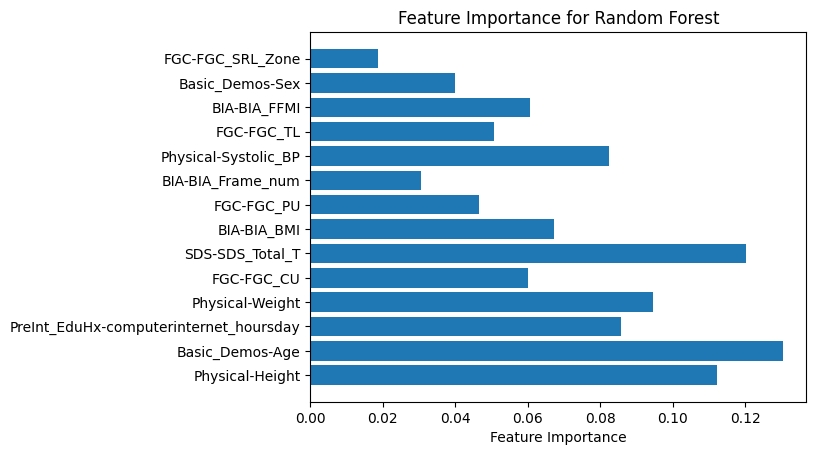

In [ ]:
import matplotlib.pyplot as plt
feature_importances = best_model.feature_importances_
feature_names = selection  # List of feature names
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Random Forest")
plt.show()


#### **CONFUSION MATRIX**

In [ ]:
# Evaluate performance on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_report = classification_report(y_test, test_predictions)
test_confusion = confusion_matrix(y_test, test_predictions)

print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Classification Report:\n{test_report}")
print(f"Test Confusion Matrix:\n{test_confusion}")

Best Model: Random Forest
Test Accuracy: 0.5620437956204379
Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       239
         1.0       0.37      0.28      0.32       110
         2.0       0.21      0.19      0.20        57
         3.0       0.00      0.00      0.00         5

    accuracy                           0.56       411
   macro avg       0.32      0.32      0.32       411
weighted avg       0.53      0.56      0.54       411

Test Confusion Matrix:
[[189  32  17   1]
 [ 58  31  21   0]
 [ 24  20  11   2]
 [  1   1   3   0]]


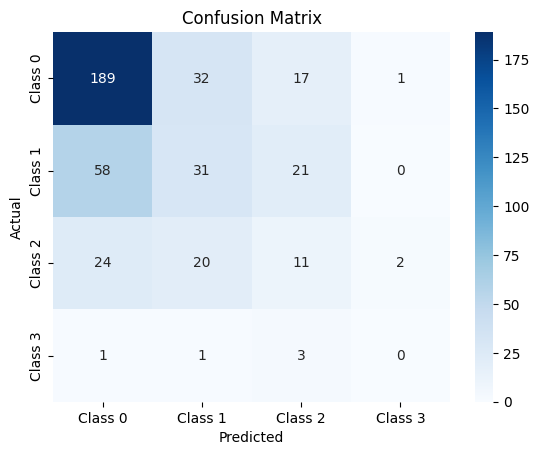

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

test_cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', "Class 3"], yticklabels=['Class 0', 'Class 1', 'Class 2', "Class 3"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### **HYPERPARAMETER TUNING**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Re-train Random Forest with best parameters
optimized_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)
optimized_rf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

#### **VALIDATE ON TEST SET**

In [ ]:
# Predictions on validation data
y_val_pred = optimized_rf.predict(X_val)

# Evaluate performance on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)
val_confusion = confusion_matrix(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:\n", val_report)


Validation Accuracy: 0.5487804878048781
Validation Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.72      0.73       239
         1.0       0.36      0.32      0.34       109
         2.0       0.26      0.32      0.28        57
         3.0       0.10      0.20      0.13         5

    accuracy                           0.55       410
   macro avg       0.36      0.39      0.37       410
weighted avg       0.56      0.55      0.55       410



In [ ]:
val_confusion = confusion_matrix(y_val, y_val_pred)
print("Validation CM:\n", val_confusion)


Validation CM:
 [[171  41  25   2]
 [ 47  35  25   2]
 [ 14  20  18   5]
 [  0   2   2   1]]


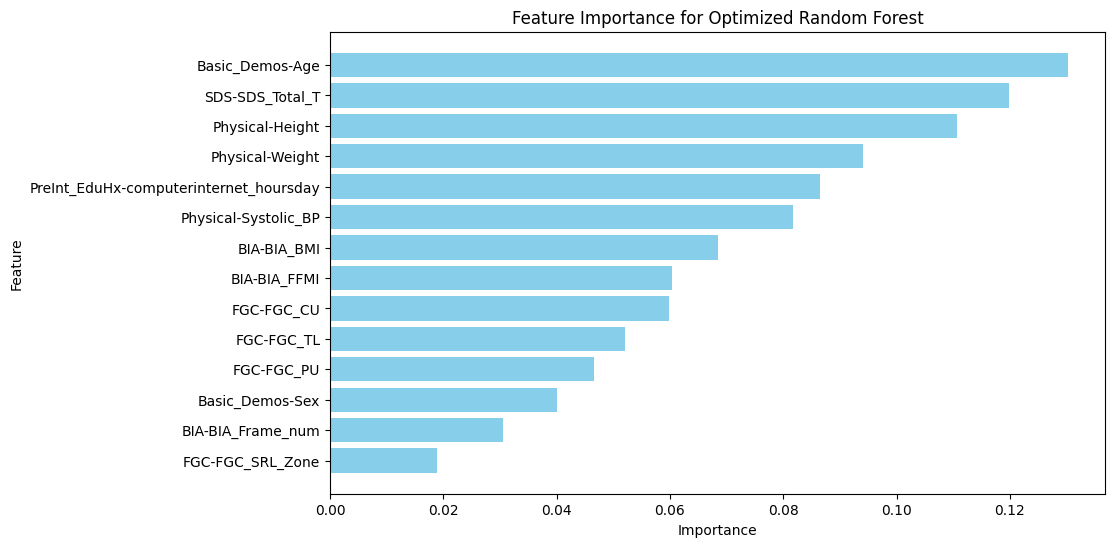

In [ ]:
# Feature importance
import matplotlib.pyplot as plt

feature_importances = optimized_rf.feature_importances_
feature_names = selection  # List of feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Optimized Random Forest")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Predictions on the test dataset (unlabeled data)
final_test_predictions = optimized_rf.predict(test)

print("Final Predictions on Test Dataset:")
print(final_test_predictions)


Final Predictions on Test Dataset:
[2. 0. 1. 1. 2. 0. 0. 1. 3. 2. 1. 0. 1. 2. 1. 2. 0. 0. 0. 2.]


In [ ]:
# Save predictions to a CSV file
test_ids = range(len(test)) if not hasattr(test, 'index') else test.index

predictions_df = pd.DataFrame({'ID': test_ids, 'Prediction': final_test_predictions})

predictions_df.to_csv('final_predictions.csv', index=False)
print("Predictions saved to 'final_predictions.csv'")

Predictions saved to 'final_predictions.csv'


## **REGRESSION**

Regression was explored as an alternative method to predict the **PCIAT_Total** score directly, which could then be converted into the **Severity Impairment Index (SII)** categories. This approach treated the problem as a regression task instead of a classification one, focusing on continuous prediction of the PCIAT_Total value.

#### **Steps Taken in the Regression Approach**

1. **Conversion of PCIAT_Total to SII**:
   - Since the **SII** is derived from **PCIAT_Total**, the regression approach aimed to predict the PCIAT_Total score and map it to SII categories based on predefined ranges:
     - `0`: None (PCIAT_Total ≤ 30)
     - `1`: Mild (30 < PCIAT_Total ≤ 49)
     - `2`: Moderate (49 < PCIAT_Total ≤ 79)
     - `3`: Severe (PCIAT_Total > 79)

2. **Preprocessing**:
   - **Imputation**: Missing values were handled using mean imputation.
   - **Normalization**: The features were normalized using `StandardScaler` to ensure all variables were on a comparable scale, which is crucial for regression models like k-Nearest Neighbors Regressor.
   - **Feature Selection**: The same 16 features identified during classification were used to maintain consistency and avoid noise from irrelevant variables.

3. **Model Selection**:
   - Several regression models were evaluated:
     - **Linear Regression**: A simple model assuming a linear relationship between the features and the target variable.
     - **k-Nearest Neighbors Regressor (kNN)**: Predicts the target as the average of the nearest neighbors in the feature space.
     - **Random Forest Regressor**: An ensemble method using decision trees to capture non-linear relationships.
     - **Gradient Boosting Regressor**: Another ensemble method focusing on reducing residual errors in sequential iterations.


In [ ]:
X = train[selection]
test = test[selection]
y = train['PCIAT-PCIAT_Total']

In [ ]:
X

,Physical-Height,Basic_Demos-Age,PreInt_EduHx-computerinternet_hoursday,Physical-Weight,FGC-FGC_CU,BIA-BIA_BMI,SDS-SDS_Total_T,FGC-FGC_PU,BIA-BIA_Frame_num,Physical-Systolic_BP,FGC-FGC_TL,BIA-BIA_FFMI,FGC-FGC_SRR_Zone,FGC-FGC_SRL_Zone
id,,,,,,,,,,,,,,
00008ff9,46.0,5,3.0,50.8,0.0,16.8792,57.647525,0.0,1.0,114.0,6.0,13.8177,0.0,0.0
000fd460,48.0,9,0.0,46.0,3.0,14.0371,64.000000,5.0,1.0,122.0,3.0,12.8254,1.0,1.0
00105258,56.5,10,2.0,75.6,20.0,17.8506,54.000000,7.0,2.0,117.0,5.0,14.0629,1.0,1.0
00115b9f,56.0,9,0.0,81.6,18.0,18.2943,45.000000,5.0,2.0,117.0,7.0,14.0740,0.0,0.0
001f3379,59.5,13,0.0,112.2,12.0,30.1865,56.000000,6.0,2.0,102.0,8.0,16.6877,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff6c2bb8,52.5,8,2.0,67.2,0.0,17.1417,58.000000,0.0,1.0,112.0,12.0,13.4004,1.0,1.0
ff759544,48.5,7,0.0,46.6,0.0,13.6457,67.000000,0.0,1.0,105.0,4.5,13.2315,0.0,0.0
ff8a2de4,59.5,13,1.0,82.4,16.0,16.3642,50.000000,10.0,1.0,104.0,12.0,14.0629,1.0,1.0


In [ ]:
y

,PCIAT-PCIAT_Total
id,
00008ff9,55.0
000fd460,0.0
00105258,28.0
00115b9f,44.0
001f3379,34.0
...,...
ff6c2bb8,22.0
ff759544,33.0
ff8a2de4,32.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Convert PCIAT_Total scores to sii categories
def convert_to_sii_category(scores):
    # Adjusted categorization based on Severity Impairment Index
    categories = []
    for score in scores:
        if score <= 30:
            categories.append(0)  # None
        elif score <= 49:
            categories.append(1)  # Mild
        elif score <= 79:
            categories.append(2)  # Moderate
        else:
            categories.append(3)  # Severe
    return np.array(categories)

y = convert_to_sii_category(train['PCIAT-PCIAT_Total'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
test = imputer.transform(test)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)
test = scaler.transform(test)

# Split the training data into features (X) and target (y)
# Ensure X and y are properly defined beforehand
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.4670070626854422
R^2 Score: 0.232783600556418


In [ ]:
test_predictions = model.predict(test)
test_predictions = np.clip(np.round(test_predictions), 0, 3)  # Assuming categories 0, 1, 2, 3
print("Test Predictions:", test_predictions)

Test Predictions: [0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.]


In [ ]:
# Instantiate the model
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.5784671532846716
Confusion Matrix:
 [[279  48   9   0]
 [ 82  33  16   0]
 [ 31  35   5   1]
 [  2   5   2   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.76       336
           1       0.27      0.25      0.26       131
           2       0.16      0.07      0.10        72
           3       0.00      0.00      0.00         9

    accuracy                           0.58       548
   macro avg       0.28      0.29      0.28       548
weighted avg       0.52      0.58      0.54       548



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV # Import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier # Import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred_best = best_model.predict(X_val)
print("Accuracy (Best Model):", accuracy_score(y_val, y_pred_best))
print("Confusion Matrix (Best Model):\n", confusion_matrix(y_val, y_pred_best))
print("Classification Report (Best Model):\n", classification_report(y_val, y_pred_best))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy (Best Model): 0.5948905109489051
Confusion Matrix (Best Model):
 [[289  41   6   0]
 [ 91  33   7   0]
 [ 33  35   4   0]
 [  2   5   2   0]]
Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.70      0.86      0.77       336
           1       0.29      0.25      0.27       131
           2       0.21      0.06      0.09        72
           3       0.00      0.00      0.00         9

    accuracy                           0.59       548
   macro avg       0.30      0.29      0.28       548
weighted avg       0.52      0.59      0.55       548



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Predict on the test dataset
test_predictions = best_model.predict(test)

# If the original `y` is categorical, you can save or further analyze the results
print("Predictions on Test Set:", test_predictions)


In [ ]:
#---------------------------------------------------------------------------------------------------------------
# Initialize regression models
models = {
    "Linear Regression": LinearRegression(),
    "k-Nearest Neighbors (kNN)": KNeighborsRegressor(n_neighbors=11),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

# Dictionary to store results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    try:
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val)

        # Calculate performance metrics
        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        # Append results
        results.append({"Model": model_name, "Mean Squared Error": mse, "R^2 Score": r2})

        # Print detailed metrics
        print(f"\nMetrics for {model_name}:")
        print(f"Mean Squared Error: {mse}")
        print(f"R^2 Score: {r2}")
    except Exception as e:
        results.append({"Model": model_name, "Mean Squared Error": "Error: " + str(e), "R^2 Score": "Error"})

regression_results_df = pd.DataFrame(results)


Metrics for Linear Regression:
Mean Squared Error: 0.4670070626854422
R^2 Score: 0.232783600556418

Metrics for k-Nearest Neighbors (kNN):
Mean Squared Error: 0.48294323460215954
R^2 Score: 0.20660307050500604

Metrics for Random Forest Regressor:
Mean Squared Error: 0.49336770802919705
R^2 Score: 0.18947736169281604

Metrics for Gradient Boosting Regressor:
Mean Squared Error: 0.4886770969400972
R^2 Score: 0.1971832703150017


In [ ]:
# Highlight best and worst results in the DataFrame
def highlight_max(s, color='green'):
    """
    Highlight the maximum in a Series with green.
    """
    is_max = s == np.nanmax(s)
    return ['background-color: {}'.format(color) if v else '' for v in is_max]

def highlight_min(s, color='red'):
    """
    Highlight the minimum in a Series with red.
    """
    is_min = s == np.nanmin(s)
    return ['background-color: {}'.format(color) if v else '' for v in is_min]


regression_results = regression_results_df.style.apply(highlight_max, color='lightgreen', subset=['R^2 Score', 'Mean Squared Error'])\
                                 .apply(highlight_min, color='salmon', subset=['R^2 Score', 'Mean Squared Error'])


print("Summary of Regression Model Performance:")
display(regression_results)

Summary of Regression Model Performance:


,Model,Mean Squared Error,R^2 Score
0,Linear Regression,0.467007,0.232784
1,k-Nearest Neighbors (kNN),0.482943,0.206603
2,Random Forest Regressor,0.493368,0.189477
3,Gradient Boosting Regressor,0.488677,0.197183


In [ ]:
# Use the best model based on R^2 Score
best_model_name = regression_results_df.sort_values(by="R^2 Score", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

test_predictions = best_model.predict(test)
test_predictions

array([ 0.43691646,  0.33781162,  0.65287592,  0.23876862,  0.90485417,
        0.46563608,  0.67287369,  0.64213423,  0.90968365,  0.94595283,
        0.61716357,  0.50241779,  0.71841347,  0.83307679,  0.78638768,
        0.4636106 , -0.01493183,  0.52814205,  0.36659052,  0.70419037])

In [ ]:
# Convert raw scores to sii categories if using regressor
test_predictions = convert_to_sii_category(test_predictions)
print("\nBest Model:", best_model_name)
print("Test Predictions:", test_predictions)



Best Model: Linear Regression
Test Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]



**Performance Evaluation**:
   - Models were evaluated using **Mean Squared Error (MSE)** and **R² (coefficient of determination)** on a validation set.
   - The **Linear Regression model** emerged as the best-performing regression model, with:
     - MSE: 0.467
     - R² Score: 0.233 (indicating that 23.3% of the variance in PCIAT_Total was explained by the model).

**Test Predictions**:
   - Predictions on the test dataset were clipped to ensure they fell within valid ranges and were converted to SII categories.

#### **Findings and Observations**

- **Linear Regression** was the simplest model but performed best among all regression techniques, suggesting that the relationship between the selected features and PCIAT_Total was primarily linear.
- Regression models struggled to achieve high predictive accuracy, as indicated by relatively low R² scores across all models. This highlights potential limitations in the features available or the complexity of the underlying relationships.
- The conversion from PCIAT_Total to SII categories introduced potential inaccuracies, as small errors in continuous predictions could lead to incorrect category assignments.

#### **Advantages of Regression**
- Allows prediction of the continuous PCIAT_Total score, which can offer more granular insights compared to categorical predictions.
- Provides flexibility to map predictions to various categorization schemes if needed.

#### **Limitations of Regression**
- Regression models did not perform as well as classification models, as seen in the lower accuracy of SII predictions derived from PCIAT_Total.
- Handling the imbalance in SII categories becomes more complex when using regression, as it indirectly affects the thresholds for category conversion.

#### **Conclusion**
While the regression approach was a valid method for predicting SII, it was outperformed by direct classification methods like Gradient Boosting and Random Forest classifiers. The regression models, particularly Linear Regression, provided reasonable results but were limited by the nature of the data and feature set. Future improvements could involve incorporating additional features or exploring hybrid methods that combine regression and classification insights.